In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
## data=pd.read_table('example.txt')

In [10]:
import json
with open('example.txt') as f:
    data=[json.loads(line) for line in f]

data=pd.DataFrame(data)

In [11]:
data.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [12]:
data.shape

(3560, 18)

In [13]:
data.iloc[0]

,0
a,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
c,US
nk,1.0
tz,America/New_York
gr,MA
g,A6qOVH
h,wfLQtf
l,orofrog
al,"en-US,en;q=0.8"
hh,1.usa.gov


In [14]:
data.groupby('tz').size()

,0
tz,
,521
Africa/Cairo,3
Africa/Casablanca,1
Africa/Ceuta,2
Africa/Johannesburg,1
...,...
Europe/Volgograd,1
Europe/Warsaw,16
Europe/Zurich,4


In [18]:
data.a.str.contains('Windows')
# to know if the OS is windows or not

,a
0,True
1,False
2,True
3,False
4,True
...,...
3555,True
3556,True
3557,False
3558,False


In [17]:
data.groupby(data.a.str.contains('Windows')).size()
# false mean that users don't use the windows operating system
# true mean that users use windows op

,0
a,
False,1194
True,2246


In [37]:
time_zone_OS_calssification=data.groupby(['tz',data.a.str.contains('Windows')])

# classiffication every time zone acoeding oprating system
#true == windwos
#false == not windows

In [38]:
time_zone_OS_calssification.size()

tz                 a    
                   False    245
                   True     276
Africa/Cairo       True       3
Africa/Casablanca  True       1
Africa/Ceuta       True       2
                           ... 
Europe/Warsaw      True      15
Europe/Zurich      False      4
Pacific/Auckland   False      3
                   True       8
Pacific/Honolulu   True      36
Length: 149, dtype: int64

<Axes: title={'center': 'time zones'}, xlabel='tz'>

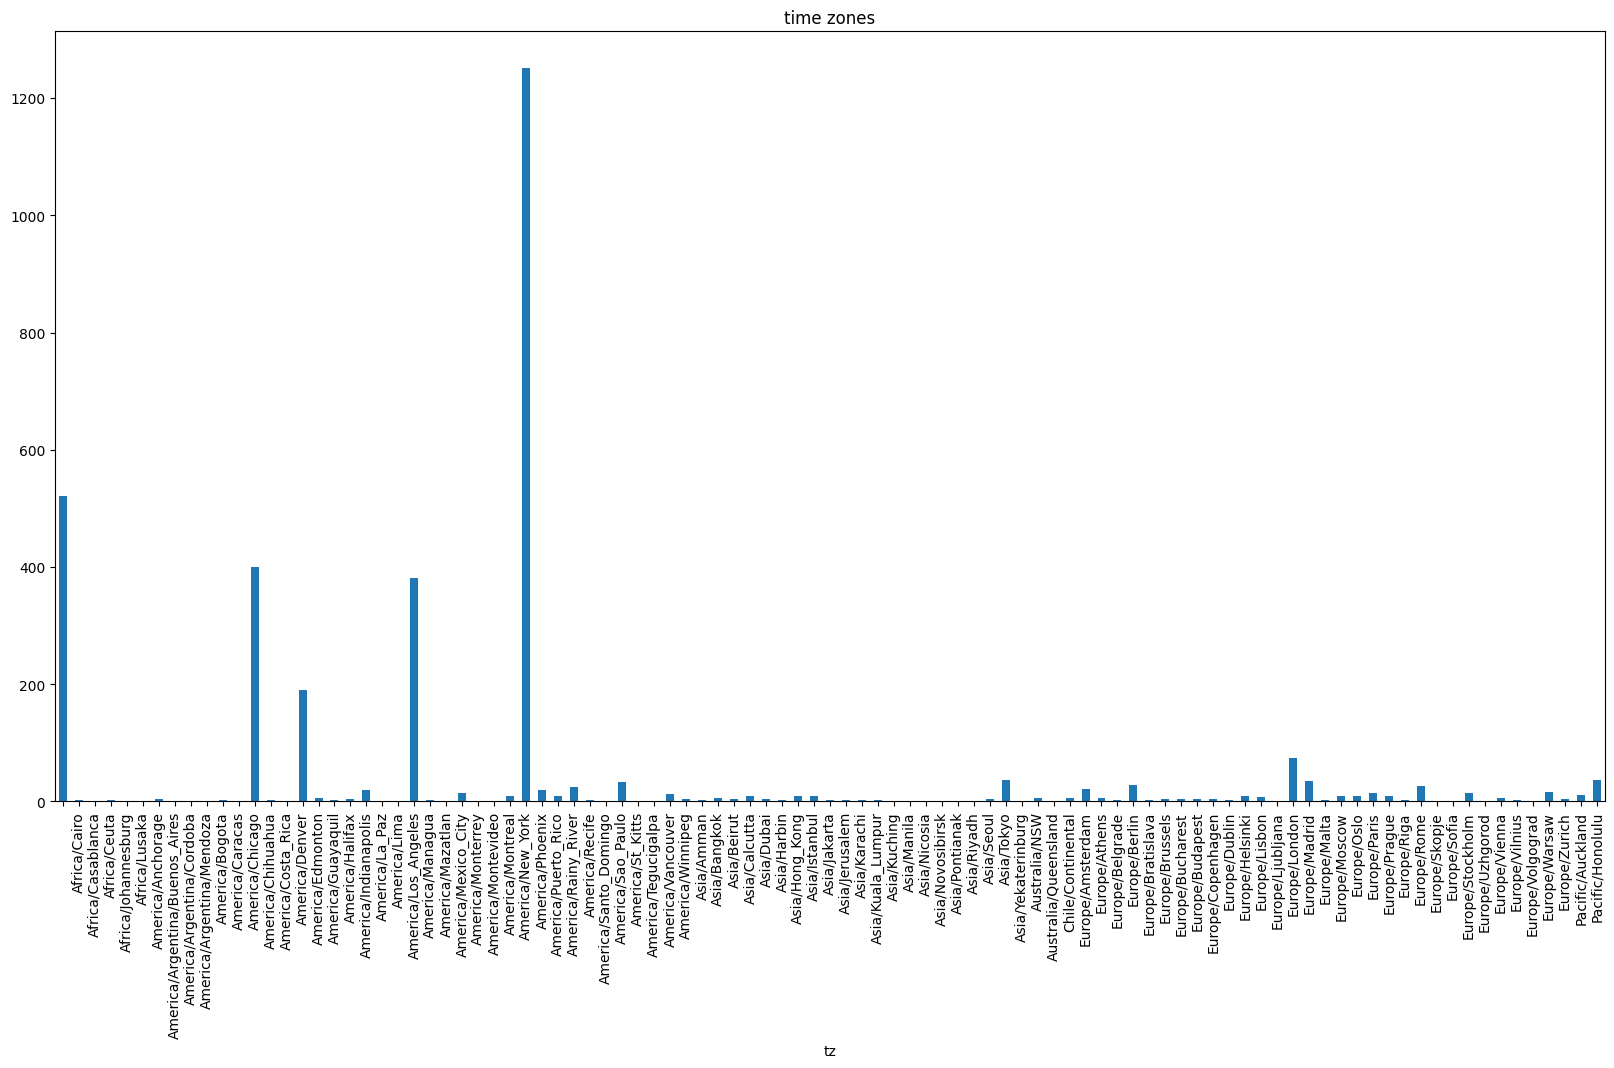

In [59]:
# polting time zones acording to how many times it use
time_zones=data.groupby('tz').size()
time_zones.plot.bar(plt.title('time zones'),figsize=(20,10))